In [147]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
sample_submission = pd.read_csv("./sample_submission_8RXa3c6.csv")
test_data = pd.read_csv("./test_AbJTz2l.csv")
train_data = pd.read_csv("./train_v9rqX0R.csv")

In [11]:
train.info()
test_data.info()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   obje

In [13]:
train_data.shape

(8523, 12)

In [14]:
test_data.shape

(5681, 11)

In [22]:
train_data.shape , test_data.shape

((8523, 13), (5681, 12))

In [15]:
# Adding columns
test_data["data"] = "test"
train_data["data"] = "train"

In [17]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,data
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [40]:
data = pd.concat([train_data,test_data])

In [41]:
data[data["data"]=="train"].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [42]:
# reseting index
# data[data["data"]=="train"].head()  --> Adding the new sequence no
data = data.reset_index().drop(columns = "index") # removing the exisint index column 

In [44]:
#Checking the code
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [48]:
# Data standarddization
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [177]:
data["Outlet_Age"] = 2021 - data["Outlet_Establishment_Year"]

In [49]:
data["Item_Fat_Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

In [50]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [52]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [82]:
data["Outlet_Size"]=data["Outlet_Size"].fillna("unknown")

In [85]:
data.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size"],dropna=False)["Outlet_Size"].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           880
                   Tier 3                unknown         925
Supermarket Type1  Tier 1                Medium         1550
                                         Small          1550
                   Tier 2                Small          1550
                                         unknown        3091
                   Tier 3                High           1553
Supermarket Type2  Tier 3                Medium         1546
Supermarket Type3  Tier 3                Medium         1559
Name: Outlet_Size, dtype: int64

In [86]:
data["Outlet_Size"] = data["Outlet_Size"].replace({"unknown":"Small"})

In [87]:
data["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [118]:
#null_data = df[df.isnull().any(axis=1)]


#data[data.isnull().any(axis=1)]
data[data.loc[:, "Item_Weight"].isna()].Item_Identifier.unique()


array(['FDP10', 'DRI11', 'FDW12', ..., 'FDC39', 'DRE03', 'FDN31'],
      dtype=object)

In [94]:
filter = data["Item_Weight"].isna()
data.where(filter)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
data[data["Item_Identifier"]=="FDN52"].head()
#data[data.loc[:, "Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,train
8919,FDN52,9.395,Regular,0.131774,Frozen Foods,87.7198,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
10070,FDN52,9.395,Regular,0.220221,Frozen Foods,88.1198,OUT010,1998,Small,Tier 3,Grocery Store,NaN,test
11486,FDN52,9.395,Regular,0.132314,Frozen Foods,88.5198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test
11593,FDN52,9.395,Regular,0.131460,Frozen Foods,85.2198,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test


In [131]:
data["Item_Weight"] = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [132]:
data[data.loc[:, "Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data


In [135]:
data[data.loc[:, "Item_Visibility"]==0.0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,FDQ19,7.350,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test
14171,FDK26,5.460,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
14177,FDQ57,7.275,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test
14184,DRG37,16.200,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [136]:
data[data["Item_Identifier"]=="FDX07"].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.380,train
1491,FDX07,19.2,Regular,0.022914,Fruits and Vegetables,181.195,OUT035,2004,Small,Tier 2,Supermarket Type1,2380.235,train
2459,FDX07,19.2,Regular,0.022965,Fruits and Vegetables,181.695,OUT045,2002,Small,Tier 2,Supermarket Type1,2563.330,train
3089,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,184.595,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.995,train
5906,FDX07,19.2,Regular,0.022954,Fruits and Vegetables,184.495,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.090,train


In [139]:
data.select_dtypes(include = np.number).corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015412,0.035751,0.000247,0.013261
Item_Visibility,-0.015412,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.035751,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000247,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

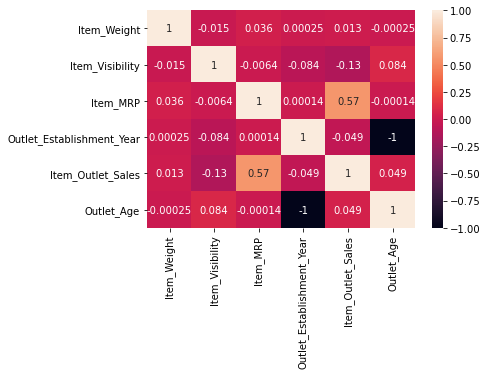

In [178]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [179]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Item_Outlet_Sales").columns

In [180]:
data.select_dtypes(exclude = np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,data
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,Small,Tier 2,Supermarket Type1,test


In [181]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_Identifier","data"]).columns

In [182]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [183]:
scaler = StandardScaler()

In [184]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [185]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Item_Identifier","Outlet_Identifier","data", "Item_Outlet_Sales"]]], axis = 1)

In [186]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [187]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [188]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Item_Outlet_Sales"])

In [189]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [190]:
train_preprocessed.to_csv("train_preprocessed.csv")
test_preprocessed.to_csv("test_preprocessed.csv")

In [191]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Identifier,Outlet_Identifier
8523,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1.710530,-1.134699,-0.533831,0.139681,-0.139681,FDW58,OUT049
8524,0,1,0,0,0,0,1,0,0,0,...,1,0,0,-0.965996,-0.534917,-0.864708,1.095319,-1.095319,FDW14,OUT017
8525,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.388391,0.653405,1.622763,0.020226,-0.020226,NCN55,OUT010
8526,1,0,0,0,0,0,0,0,0,0,...,1,0,0,-1.177753,-0.982657,0.225966,1.095319,-1.095319,FDQ58,OUT017
8527,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0.173409,1.023121,1.501577,-1.532686,1.532686,FDY38,OUT027


In [192]:
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,-0.751014,-0.969852,1.752511,0.139681,-0.139681,FDA15,OUT049,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,1,0,-1.477653,-0.907063,-1.493696,1.334228,-1.334228,DRC01,OUT018,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1.011839,-0.956000,0.009874,0.139681,-0.139681,FDN15,OUT049,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1.377308,-1.281712,0.661838,0.020226,-0.020226,FDX07,OUT010,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,0,-0.830557,-1.281712,-1.403623,-1.293777,1.293777,NCD19,OUT013,994.7052


### MODEL

In [197]:
model = LinearRegression()

In [198]:
X = train_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [199]:
y = train_preprocessed["Item_Outlet_Sales"]

In [201]:
model.fit(X,y)

LinearRegression()

In [202]:
mean_squared_error(y, model.predict(X),squared=False)

1127.0460988598134

In [ ]:
X_test = test_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
sample_submission["Item_Outlet_Sales"] = y_pred

In [ ]:
submission = sample_submission

In [ ]:
submission['Item_Outlet_Sales'] = np.abs(submission['Item_Outlet_Sales'])

In [ ]:
submission.to_csv("linear_regression_result.csv", index = False)